___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
data = pd.read_csv('Ecommerce Customers')

**Let's look at the data**

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

In [7]:
sns.set_palette('GnBu_d')
sns.set_style('darkgrid')

C:\Users\filas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


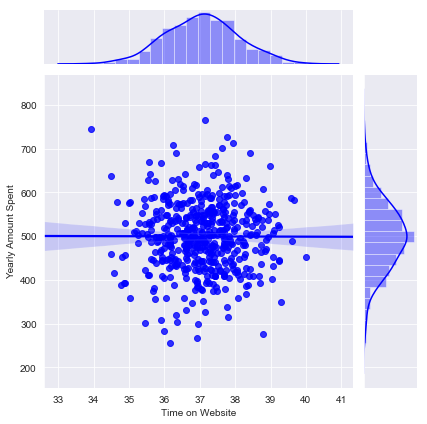

In [8]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data, color = 'b', kind="reg")

** Do the same but with the Time on App column instead. **

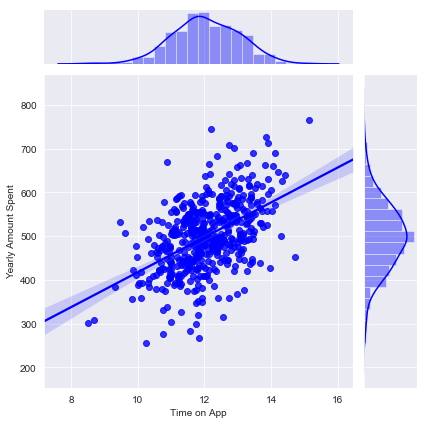

In [9]:
# More time on app, more money spent.
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,color = 'b', kind="reg")

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

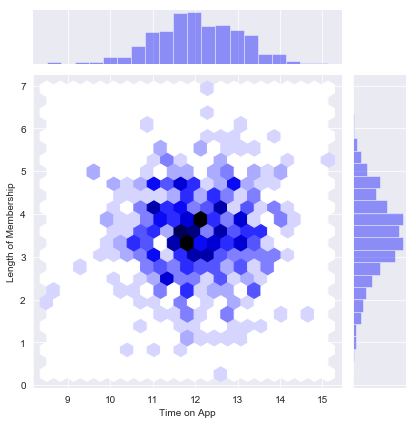

In [10]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', kind = 'hex', data = data, color = 'b')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

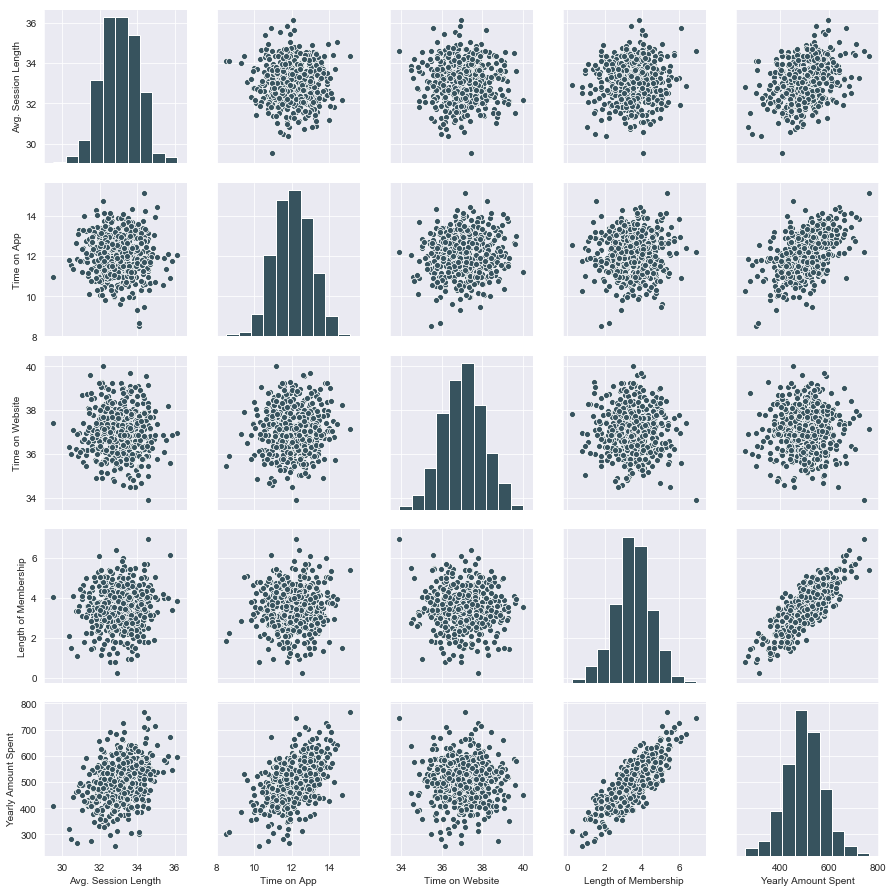

In [17]:
sns.pairplot(data)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Length of Membership**

**A linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.**

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data) 

## Training and Testing Data

**Split the data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [ ]:
y = data['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [ ]:
lm.fit(X_train, y_train)

**Print out the coefficients of the model**

In [ ]:
lm.coef_

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [ ]:
predictions = lm.predict (X_test)

**A scatterplot of the real test values versus the predicted values.**

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

## Evaluating the Model

In [ ]:
 from sklearn import metrics

In [ ]:
print ('MAE ', metrics.mean_absolute_error(y_test, predictions))
print ('MSE ', metrics.mean_squared_error(y_test, predictions))
print ('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
metrics.explained_variance_score(y_test,predictions)

## Residuals

**Exploring the residuals to make sure everything was okay with our data.** 


In [ ]:
sns.distplot((y_test-predictions), bins = 50)

The model coefiicients

In [ ]:
pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

**Interpreting the results**